In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

In [ ]:
from scipy.linalg import toeplitz
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

Using TensorFlow backend.


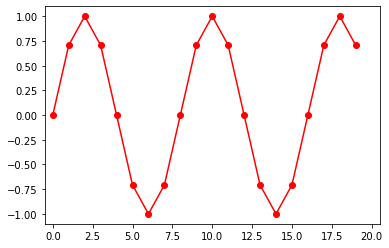

In [ ]:
s = np.sin( 2* np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

### 훈련용 데이터 만들기

In [ ]:
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [ ]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [ ]:
X_train[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [ ]:
Y_train[:4]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

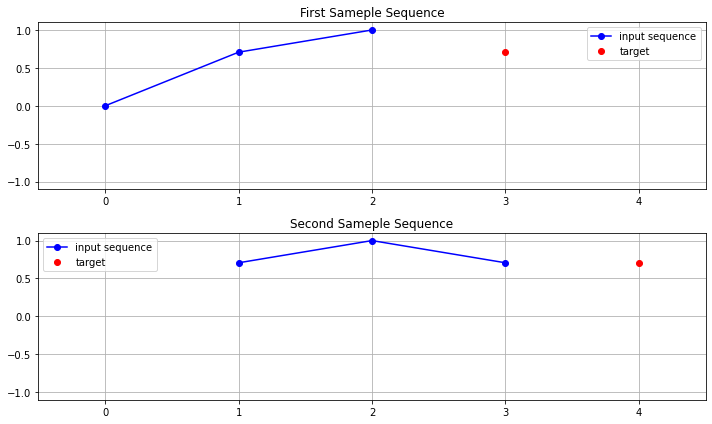

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label='input sequence')
plt.plot([3], Y_train[0], 'ro', label='target')
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title('First Sameple Sequence')


plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label='input sequence')
plt.plot([4], Y_train[0], 'ro', label='target')
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title('Second Sameple Sequence')

plt.tight_layout()
plt.show()

In [ ]:
seed = 2020
np.random.seed(seed)

In [ ]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=[3, 1]))
model.add(Dense(1, activation='linear'))
model.summary()

# (1 + 10) * 10 + 10

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss ='mse', optimizer='sgd')

In [ ]:
def train_graph(labels):
    plt.plot(Y_train, 'ro-', label='target')
    plt.plot(model.predict(X_train[:, :, :]), 'bs-', label='output')
    plt.xlim(-0.5, 20.5)
    plt.ylim(-1.1, 1.1)
    plt.legend()
    plt.title(labels)
    plt.show()

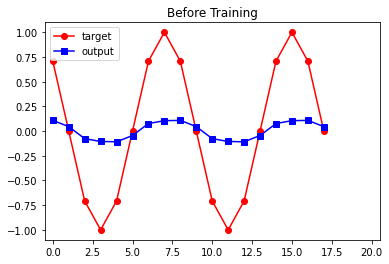

In [ ]:
train_graph('Before Training')

In [ ]:
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 0.3665
Epoch 2/100
18/18 [==============================] - 0s 376us/step - loss: 0.3462
Epoch 3/100
18/18 [==============================] - 0s 339us/step - loss: 0.3269
Epoch 4/100
18/18 [==============================] - 0s 291us/step - loss: 0.3087
Epoch 5/100
18/18 [==============================] - 0s 323us/step - loss: 0.2915
Epoch 6/100
18/18 [==============================] - 0s 286us/step - loss: 0.2752
Epoch 7/100
18/18 [==============================] - 0s 267us/step - loss: 0.2598
Epoch 8/100
18/18 [==============================] - 0s 278us/step - loss: 0.2451
Epoch 9/100
18/18 [==============================] - 0s 237us/step - loss: 0.2313
Epoch 10/100
18/18 [==============================] - 0s 274us/step - loss: 0.2182
Epoch 11/100
18/18 [==============================] - 0s 281us/step - loss: 0.2058
Epoch 12/100
18/18 [==============================] - 0s 291us/step - loss: 0.1940
Epoch 13/100
18

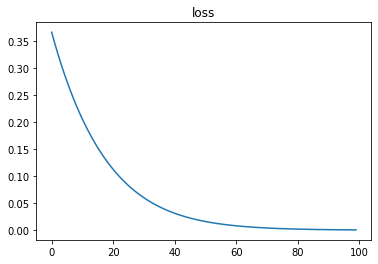

In [ ]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

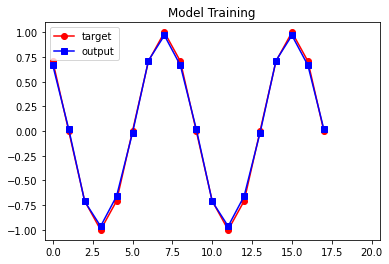

In [ ]:
train_graph('Model Training')

In [ ]:
model2 = Sequential([
        SimpleRNN(5, input_shape=[3,1]),
        Dense(1, activation='linear')
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss ='mse', optimizer='sgd')

In [ ]:
history2 = model2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3769
Epoch 2/100
18/18 [==============================] - 0s 334us/step - loss: 0.3678
Epoch 3/100
18/18 [==============================] - 0s 290us/step - loss: 0.3590
Epoch 4/100
18/18 [==============================] - 0s 359us/step - loss: 0.3503
Epoch 5/100
18/18 [==============================] - 0s 275us/step - loss: 0.3418
Epoch 6/100
18/18 [==============================] - 0s 291us/step - loss: 0.3335
Epoch 7/100
18/18 [==============================] - 0s 311us/step - loss: 0.3254
Epoch 8/100
18/18 [==============================] - 0s 339us/step - loss: 0.3175
Epoch 9/100
18/18 [==============================] - 0s 320us/step - loss: 0.3097
Epoch 10/100
18/18 [==============================] - 0s 290us/step - loss: 0.3021
Epoch 11/100
18/18 [==============================] - 0s 294us/step - loss: 0.2947
Epoch 12/100
18/18 [==============================] - 0s 332us/step - loss: 0.2875
Epoch 13/100
18

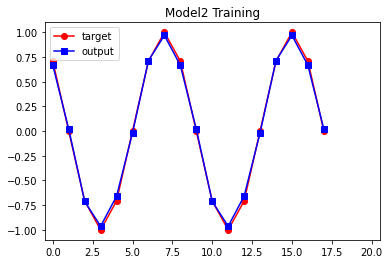

In [ ]:
train_graph('Model2 Training')

In [ ]:
model3 = Sequential([
        SimpleRNN(20, input_shape=[3,1]),
        Dense(1, activation='linear')
])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss ='mse', optimizer='sgd')

In [ ]:
history3 = model3.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 1.4777
Epoch 2/100
18/18 [==============================] - 0s 336us/step - loss: 1.3710
Epoch 3/100
18/18 [==============================] - 0s 241us/step - loss: 1.2741
Epoch 4/100
18/18 [==============================] - 0s 236us/step - loss: 1.1857
Epoch 5/100
18/18 [==============================] - 0s 212us/step - loss: 1.1048
Epoch 6/100
18/18 [==============================] - 0s 218us/step - loss: 1.0304
Epoch 7/100
18/18 [==============================] - 0s 261us/step - loss: 0.9619
Epoch 8/100
18/18 [==============================] - 0s 329us/step - loss: 0.8985
Epoch 9/100
18/18 [==============================] - 0s 319us/step - loss: 0.8398
Epoch 10/100
18/18 [==============================] - 0s 288us/step - loss: 0.7853
Epoch 11/100
18/18 [==============================] - 0s 349us/step - loss: 0.7345
Epoch 12/100
18/18 [==============================] - 0s 304us/step - loss: 0.6872
Epoch 13/100
18

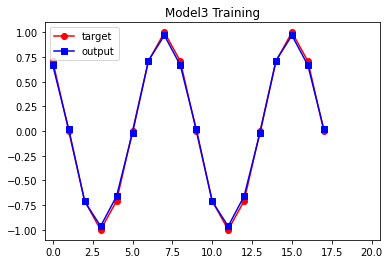

In [ ]:
train_graph('Model3 Training')

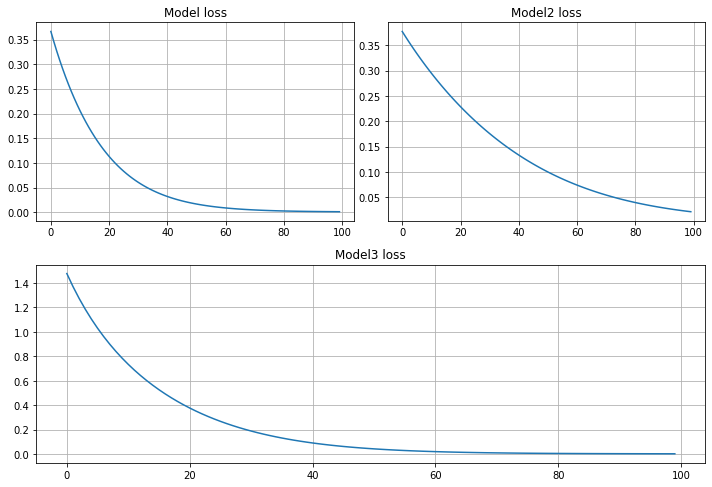

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(321)
plt.plot(history.history['loss'])
plt.grid()
plt.title('Model loss')

plt.subplot(322)
plt.plot(history2.history['loss'])
plt.grid()
plt.title('Model2 loss')

plt.subplot(312)
plt.plot(history3.history['loss'])
plt.grid()
plt.title('Model3 loss')

plt.tight_layout()
plt.show()

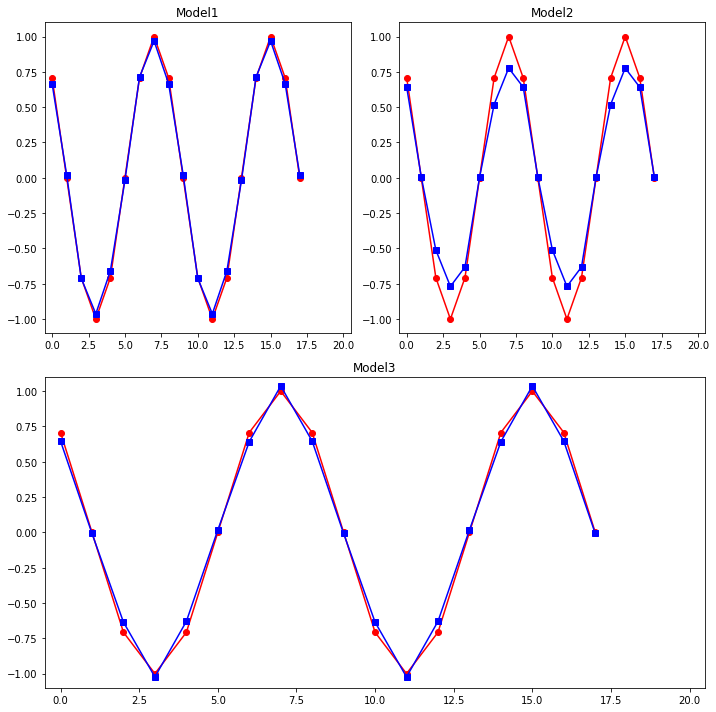

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.plot(Y_train, 'ro-', label='target')
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label='output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.title('Model1')
    
plt.subplot(222)
plt.plot(Y_train, 'ro-', label='target')
plt.plot(model2.predict(X_train[:, :, :]), 'bs-', label='output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.title('Model2')

plt.subplot(212)
plt.plot(Y_train, 'ro-', label='target')
plt.plot(model3.predict(X_train[:, :, :]), 'bs-', label='output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.title('Model3')

plt.tight_layout()
plt.show()